In [1]:
# IMPORTING ALL LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
# Load the data
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
# Exploring the dataset
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
# transaction data is chips
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# 3 CHECKING DATA FORMATS AND CORRECTING IF APPLICABLE...

In [5]:
# Data attributes, checking for missing values and data types

print("Purchase Data Info:")
print(purchase_behaviour.info())
print("\nTransaction Data Info:")
print(transaction_data.info())

Purchase Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  f

In [6]:
# changing the date time dtype from int64 to datetime
# handling the date data type to convert from int64 to datetime

transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [7]:
# checking the date data type to see...
# transaction data
print("\nTransaction Data Info:")
print(transaction_data.info())


Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB
None


In [8]:
# purchase_data
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [9]:
# looking at columns and count of purchase_behaviour

purchase_behaviour['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [10]:
# looking at columns and count of the purchase_behaviour

purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [11]:
# looking at columns and count of the transaction_data

transaction_data['PROD_NAME'].unique()


array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [12]:
# we should split company names from the chips names from the weight as well
# some spotted that arent chips are pork benny, dont think thats salt, sea salt, 

In [13]:
# Seperating the chips weight
transaction_data['WEIGHT'] = transaction_data['PROD_NAME'].str[-4:]


In [14]:
transaction_data['WEIGHT']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: WEIGHT, Length: 264836, dtype: object

In [15]:
transaction_data['WEIGHT'].value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: WEIGHT, dtype: int64

In [16]:
# correcting the data

transaction_data["WEIGHT"] = transaction_data["WEIGHT"].replace({'Salt':'135g', "210G": "210g", "150G": "150g", "175G" :"175g" })

In [17]:
transaction_data['WEIGHT'].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [18]:
transaction_data["PROD_NAME"] = transaction_data["PROD_NAME"].str.strip()

In [19]:
# dropping salsa thats not a chip from the list

index_drop=transaction_data[transaction_data["PROD_NAME"] =="Old El Paso Salsa"].index

transaction_data=transaction_data.drop(index_drop)

In [20]:
#  to confirm the dropping of the salsa
transaction_data[transaction_data["PROD_NAME"] == "Old El Paso Salsa"].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
dtype: int64

In [21]:
# creating brands

transaction_data["BRANDS"] = transaction_data["PROD_NAME"].str.split().str.get(0)

transaction_data["BRANDS"].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRANDS, dtype: int64

In [22]:
# Now we will check another coulumn after the WEIGHT AND PROD_NAME, DATE IS NEXT
transaction_data["DATE"].unique()

array(['2018-10-17T00:00:00.000000000', '2019-05-14T00:00:00.000000000',
       '2019-05-20T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-08-18T00:00:00.000000000', '2019-05-19T00:00:00.000000000',
       '2019-05-16T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2019-05-17T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-05-15T00:00:00.000000000', '2018-08-14T00:00:00.000000000',
       '2018-08-16T00:00:00.000000000', '2018-08-19T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2019-06-17T00:00:00.000000000',
       '2018-09-05T00:00:00.000000000', '2018-09-27T00:00:00.000000000',
       '2019-02-27T00:00:00.000000000', '2019-03-19T00:00:00.000000000',
       '2019-06-16T00:00:00.000000000', '2018-11-25T00:00:00.000000000',
       '2018-11-10T00:00:00.000000000', '2019-03-09T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2019-03-13T00:00:00.000000000',
       '2019-04-06T00:00:00.000000000', '2018-07-30

In [23]:
# This indicates a date missing
transaction_data["DATE"].nunique()

364

In [24]:
# to find the missing date so we could add it
transaction_data_dates = transaction_data.sort_values(by='DATE')
transaction_data["DATE"].unique()

array(['2018-10-17T00:00:00.000000000', '2019-05-14T00:00:00.000000000',
       '2019-05-20T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-08-18T00:00:00.000000000', '2019-05-19T00:00:00.000000000',
       '2019-05-16T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2019-05-17T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-05-15T00:00:00.000000000', '2018-08-14T00:00:00.000000000',
       '2018-08-16T00:00:00.000000000', '2018-08-19T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2019-06-17T00:00:00.000000000',
       '2018-09-05T00:00:00.000000000', '2018-09-27T00:00:00.000000000',
       '2019-02-27T00:00:00.000000000', '2019-03-19T00:00:00.000000000',
       '2019-06-16T00:00:00.000000000', '2018-11-25T00:00:00.000000000',
       '2018-11-10T00:00:00.000000000', '2019-03-09T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2019-03-13T00:00:00.000000000',
       '2019-04-06T00:00:00.000000000', '2018-07-30

In [25]:

# Convert the 'date' column to datetime if it's not already in datetime format
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"])

# Count the number of unique dates
unique_dates_count = transaction_data["DATE"].nunique()

# Get the count for each unique date
date_counts = transaction_data["DATE"].value_counts()

print("Number of unique dates:", unique_dates_count)
print("Count for each unique date:")
print(date_counts)

Number of unique dates: 364
Count for each unique date:
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64


In [26]:
# adding the missing data and creating a short format datetime
transaction_data['SHORT_DATE'] = pd.to_datetime(transaction_data["DATE"]).dt.strftime('%Y-%m-%d')

transaction_data_christmas = {"SHORT_DATE" : "2018-12-25"}

transaction_data = transaction_data.append(transaction_data_christmas, ignore_index=True)

transaction_data["SHORT_DATE"].value_counts(dropna = False)

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
2018-12-25      1
Name: SHORT_DATE, Length: 365, dtype: int64

In [27]:
# looking back at duplicates, we can use
# RRD is the same as Red so we can replace this

transaction_data["BRANDS"] = transaction_data["BRANDS"].replace({"RRD":"Red"})


transaction_data["BRANDS"].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Red           17779
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRANDS, dtype: int64

In [28]:
# merging some other brands togehter that we can spot like dorito, Infzns,smith

transaction_data["BRANDS"] = transaction_data["BRANDS"].replace({"Dorito":"Doritos", "Smith" : "Smiths", "Infzns": "Infuzions"})

transaction_data["BRANDS"].value_counts()

Kettle        41288
Smiths        31823
Doritos       28147
Pringles      25102
Red           17779
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRANDS, dtype: int64

# 2 FINDING OUTLIERS AND REMOVING THEM IF APPLICABLE...

In [29]:
transaction_data.sort_values(by='PROD_QTY')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRANDS,SHORT_DATE
89422,2019-03-23,121.0,121375.0,124473.0,99.0,Pringles Sthrn FriedChicken 134g,1.0,3.7,134g,Pringles,2019-03-23
246113,2018-09-22,98.0,98437.0,98193.0,109.0,Pringles Barbeque 134g,1.0,3.7,134g,Pringles,2018-09-22
246114,2019-03-03,98.0,98437.0,98194.0,40.0,Thins Chips Seasonedchicken 175g,1.0,3.3,175g,Thins,2019-03-03
246115,2018-12-02,98.0,98440.0,98195.0,32.0,Kettle Sea Salt And Vinegar 175g,1.0,5.4,175g,Kettle,2018-12-02
246116,2019-05-01,98.0,98440.0,98196.0,38.0,Infuzions Mango Chutny Papadums 70g,1.0,2.4,70g,Infuzions,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
5160,2019-05-15,82.0,82189.0,81669.0,46.0,Kettle Original 175g,5.0,27.0,175g,Kettle,2019-05-15
150472,2019-05-16,58.0,58176.0,53591.0,99.0,Pringles Sthrn FriedChicken 134g,5.0,18.5,134g,Pringles,2019-05-16
69763,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20
69762,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19


In [30]:
# from the data above we can identify an outlier so we need to handle it

transaction_data[transaction_data["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRANDS,SHORT_DATE
69762,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19
69763,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20


In [31]:
# dropping outlier

transaction_data = transaction_data.drop([69763,69762])

transaction_data = transaction_data.reset_index(drop = True)

In [32]:
# confirming dropped outlier

transaction_data.sort_values(by='PROD_QTY')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRANDS,SHORT_DATE
125902,2019-06-16,120.0,120085.0,123595.0,110.0,WW Original Corn Chips 200g,1.0,1.9,200g,WW,2019-06-16
246110,2018-12-03,98.0,98416.0,98175.0,107.0,Smiths Crinkle Cut French OnionDip 150g,1.0,2.6,150g,Smiths,2018-12-03
246111,2018-09-22,98.0,98437.0,98193.0,109.0,Pringles Barbeque 134g,1.0,3.7,134g,Pringles,2018-09-22
246112,2019-03-03,98.0,98437.0,98194.0,40.0,Thins Chips Seasonedchicken 175g,1.0,3.3,175g,Thins,2019-03-03
246113,2018-12-02,98.0,98440.0,98195.0,32.0,Kettle Sea Salt And Vinegar 175g,1.0,5.4,175g,Kettle,2018-12-02
...,...,...,...,...,...,...,...,...,...,...,...
117674,2018-08-18,125.0,125092.0,128645.0,46.0,Kettle Original 175g,5.0,27.0,175g,Kettle,2018-08-18
117671,2018-08-16,123.0,123287.0,127260.0,40.0,Thins Chips Seasonedchicken 175g,5.0,16.5,175g,Thins,2018-08-16
5415,2018-08-20,236.0,236116.0,239252.0,12.0,Natural Chip Co Tmato Hrb&Spce 175g,5.0,15.0,175g,Natural,2018-08-20
151105,2019-05-15,250.0,250029.0,251592.0,71.0,Twisties Cheese Burger 250g,5.0,21.5,250g,Twisties,2019-05-15


In [33]:
# merging both datasets, transaction_data and purchase_behaviour

transaction_data_merged = pd.merge(transaction_data,purchase_behaviour,on = 'LYLTY_CARD_NBR', how = "left")

transaction_data_merged


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRANDS,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175g,Natural,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175g,CCs,2019-05-14,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170g,Smiths,2019-05-20,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175g,Smiths,2018-08-17,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150g,Kettle,2018-08-18,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,175g,Tostitos,2018-08-13,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,170g,Doritos,2018-11-06,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,150g,Doritos,2018-12-27,YOUNG SINGLES/COUPLES,Premium
264833,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,175g,Tostitos,2018-09-22,YOUNG SINGLES/COUPLES,Premium


In [34]:
# Calling on the columns that we need

#transaction_data_final = transaction_data_merged[["SHORT_DATE" , "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NBR", "BRANDS", ""]]

In [35]:
# Saving the file to CSV

transaction_data_merged.to_csv("transaction_data_merged.csv")

# Exploring the data to gain insights

# 1 Creating and interpreting High level summaries of the Data

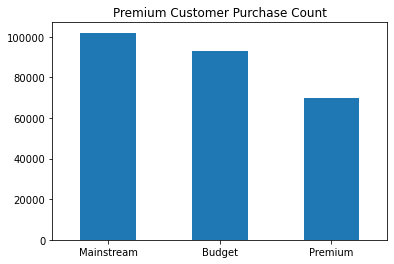

In [36]:
# checking the count of purchase by the premium customer

premium_customer = transaction_data_merged["PREMIUM_CUSTOMER"].value_counts()

premium_customer.plot(kind = "bar")
plt.xticks(rotation = 360)
plt.title("Premium Customer Purchase Count")
plt.show()

In [37]:
# UNIQUE PREMIUM CUSTOMER COUNT

unique_value = transaction_data_merged.drop_duplicates(subset = "LYLTY_CARD_NBR")

premium_customer_unique= unique_value["PREMIUM_CUSTOMER"].value_counts()

premium_customer_unique

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

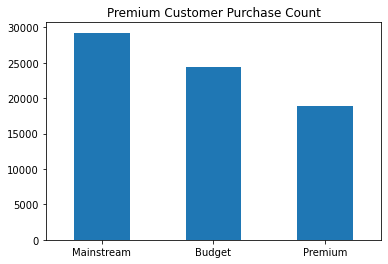

In [38]:
# premium_customer_unique_chart

premium_customer_unique_chart = unique_value["PREMIUM_CUSTOMER"].value_counts()

premium_customer_unique_chart.plot(kind = "bar")

plt.xticks(rotation = 360)
plt.title("Premium Customer Purchase Count")
plt.show()


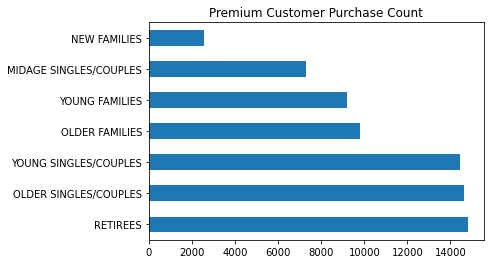

In [39]:
# Moving onto the unique life stage 

life_stage_unique_chart = unique_value["LIFESTAGE"].value_counts()

life_stage_unique_chart.plot(kind = "barh")

plt.xticks(rotation = 360)
plt.title("Premium Customer Purchase Count")
plt.show()

In [40]:
# grouping by brand

transaction_data_merged_brand = transaction_data_merged.groupby("BRANDS")

In [41]:
#| TOP BRNADS BY SALES
# SUMING THE SALES FOR EACH BRAND

transaction_data_merged_sales_brand = transaction_data_merged_brand["TOT_SALES"].sum()

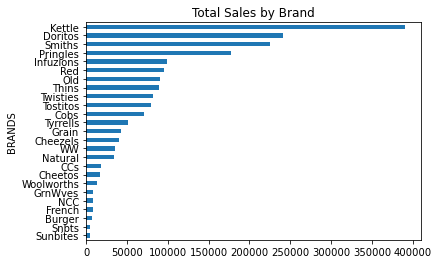

In [42]:
transaction_data_merged_sales_brand.sort_values().plot(kind = "barh")
plt.title ("Total Sales by Brand")
plt.show()

In [43]:
# Top 10 purchases by memeber number

transaction_data_merged_members = transaction_data_merged.groupby("LYLTY_CARD_NBR")

transaction_data_merged_sales_members = transaction_data_merged_members["TOT_SALES"].sum()

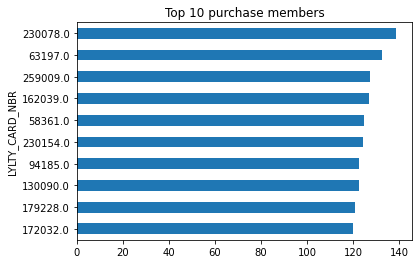

In [44]:
transaction_data_merged_sorted = transaction_data_merged_sales_members.sort_values()

transaction_data_merged_sorted.tail(10).plot(kind = "barh")

plt.title("Top 10 purchase members")

plt.show()

In [45]:
top_ten = [230078.0,63197,259009,162039,58361,230154,94185,130090,179228,172032]

top_ten_members = transaction_data_merged[transaction_data_merged["LYLTY_CARD_NBR"].isin(top_ten)]

top_ten_grouped = top_ten_members.groupby("LYLTY_CARD_NBR")

top_ten_grouped["LIFESTAGE"].value_counts()

LYLTY_CARD_NBR  LIFESTAGE            
58361.0         YOUNG FAMILIES           14
63197.0         OLDER FAMILIES           15
94185.0         YOUNG FAMILIES           16
130090.0        YOUNG FAMILIES           14
162039.0        OLDER FAMILIES           18
172032.0        YOUNG SINGLES/COUPLES    18
179228.0        YOUNG FAMILIES           16
230078.0        OLDER FAMILIES           17
230154.0        OLDER FAMILIES           14
259009.0        OLDER SINGLES/COUPLES    15
Name: LIFESTAGE, dtype: int64

In [46]:
top_ten_grouped["PREMIUM_CUSTOMER"].value_counts()

LYLTY_CARD_NBR  PREMIUM_CUSTOMER
58361.0         Budget              14
63197.0         Budget              15
94185.0         Premium             16
130090.0        Budget              14
162039.0        Mainstream          18
172032.0        Mainstream          18
179228.0        Budget              16
230078.0        Budget              17
230154.0        Budget              14
259009.0        Mainstream          15
Name: PREMIUM_CUSTOMER, dtype: int64

In [47]:
# grouping by lifestage and extracting total sales

transaction_data_merged_lifestage = transaction_data_merged.groupby("LIFESTAGE")

transaction_data_merged_lifestage_sales = transaction_data_merged_lifestage["TOT_SALES"].sum()

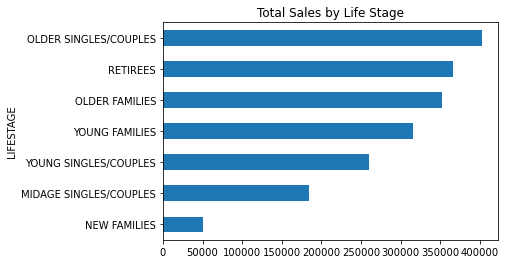

In [48]:
transaction_data_merged_lifestage_sales.sort_values().plot(kind = "barh")
plt.title("Total Sales by Life Stage")
plt.show()

In [49]:
# Total queantity purchase by lifestage

transaction_data_merged_lifestage_qty = transaction_data_merged_lifestage["PROD_QTY"].sum()

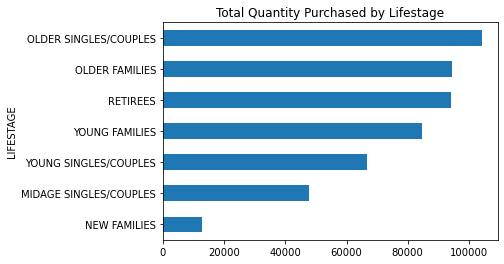

In [50]:
transaction_data_merged_lifestage_qty.sort_values().plot(kind= "barh")
plt.title("Total Quantity Purchased by Lifestage")
plt.show()

In [51]:
# avegrage sales by life stage

transaction_data_merged_lifestage_average_sales = transaction_data_merged_lifestage["TOT_SALES"].mean()

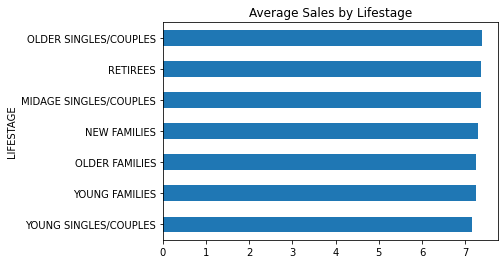

In [52]:
transaction_data_merged_lifestage_average_sales.sort_values().plot(kind = "barh")
plt.title("Average Sales by Lifestage")
plt.show()

In [53]:
# AVERAGE QTY PURCHASE BY LIFESTAGE

transaction_data_merged_lifestage_average_qty = transaction_data_merged_lifestage["PROD_QTY"].mean()

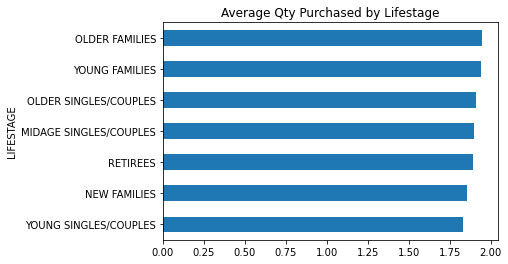

In [54]:
transaction_data_merged_lifestage_average_qty.sort_values().plot(kind = "barh")
plt.title("Average Qty Purchased by Lifestage")
plt.show()

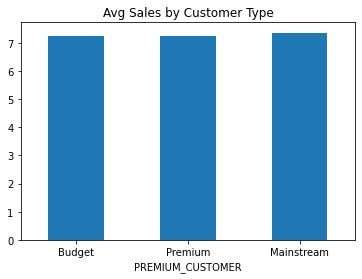

In [55]:
# AVERAGE SALES BY CUSTOMER TYPE

transaction_data_merged_customer_type = transaction_data_merged.groupby("PREMIUM_CUSTOMER")

transaction_data_merged_customer_type_avg_sales = transaction_data_merged_customer_type["TOT_SALES"].mean()

transaction_data_merged_customer_type_avg_qty = transaction_data_merged_customer_type["PROD_QTY"].mean()

transaction_data_merged_customer_type_avg_sales.sort_values().plot(kind = "bar")
plt.xticks(rotation = 360)
plt.title("Avg Sales by Customer Type")
plt.show()

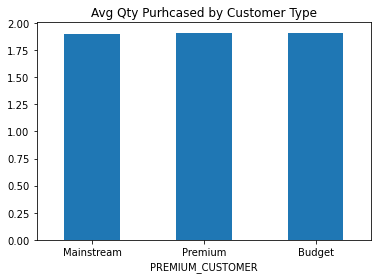

In [56]:
# AVERAGE QTY PURCHASED BY CUSTOMER_TYPE

transaction_data_merged_customer_type_avg_qty.sort_values().plot(kind = "bar")
plt.xticks(rotation = 360)
plt.title("Avg Qty Purhcased by Customer Type")
plt.show()

In [57]:
# THOUGH WE SAW SOEM DIFFERENCE BETWEEN SOME OF THE QTY PURCHASED BY SOME CUSOMRES IN THE LIFESTAGE.
# WE WANT TO CHECK SOME OTHERS THAT ARENT SO APPARENT

In [58]:
# USING STATISTICAL METHODS TO CHECK FOR ANY SIGNIFICANT DIFFERNECE WHICH IS P value and T statistics

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

transaction_data_merged_lifestage.describe()


STORE_NBR                                           \
                           count        mean        std  min   25%    50%   
LIFESTAGE                                                                   
MIDAGE SINGLES/COUPLES   25110.0  135.664755  76.613509  1.0  71.0  133.0   
NEW FAMILIES              6919.0  133.769475  77.816076  1.0  67.0  131.0   
OLDER FAMILIES           48594.0  134.165000  75.176434  1.0  70.0  128.0   
OLDER SINGLES/COUPLES    54479.0  134.024542  76.438581  1.0  69.0  130.0   
RETIREES                 49763.0  136.159295  77.859231  1.0  70.0  133.0   
YOUNG FAMILIES           43592.0  136.019476  75.474556  1.0  71.0  133.0   
YOUNG SINGLES/COUPLES    36377.0  135.122138  79.344684  1.0  65.0  133.0   

                                     LYLTY_CARD_NBR                 ...  \
                          75%    max          count           mean  ...   
LIFESTAGE                                                           ...   
MIDAGE SINGLES/COUPLES  203.0  272.0        25110.0  136208.697810  ...   
NEW FAMILIES            201.0  272.0         6919.0  133970.287469  ...   
OLDER FAMILIES          199.0  272.0        48594.0  134510.856567  ...   
OLDER SINGLES/COUPLES   201.0  272.0        54479.0  134670.120762  ...   
RETIREES                207.0  272.0        49763.0  136621.915982  ...   
YOUNG FAMILIES          201.0  272.0        43592.0  136382.402551  ...   
YOUNG SINGLES/COUPLES   205.0  272.0        36377.0  135629.000247  ...   

                       PROD_QTY      TOT_SALES                                \
                            75%  max     count      mean       std  min  25%   
LIFESTAGE                                                                      
MIDAGE SINGLES/COUPLES      2.0  5.0   25110.0  7.357678  2.532071  1.5  5.6   
NEW FAMILIES                2.0  5.0    6919.0  7.289124  2.557880  1.5  5.4   
OLDER FAMILIES              2.0  5.0   48594.0  7.253307  2.488841  1.5  5.4   
OLDER SINGLES/COUPLES       2.0  5.0   54479.0  7.386823  2.511223  1.5  5.8   
RETIREES                    2.0  5.0   49763.0  7.364325  2.529464  1.5  5.6   
YOUNG FAMILIES              2.0  5.0   43592.0  7.252709  2.486029  1.5  5.4   
YOUNG SINGLES/COUPLES       2.0  5.0   36377.0  7.158515  2.628117  1.5  5.4   

                                        
                        50%  75%   max  
LIFESTAGE                               
MIDAGE SINGLES/COUPLES  7.4  9.2  29.5  
NEW FAMILIES            7.4  9.2  27.0  
OLDER FAMILIES          7.4  8.8  29.5  
OLDER SINGLES/COUPLES   7.4  9.2  29.5  
RETIREES                7.4  9.2  29.5  
YOUNG FAMILIES          7.4  8.8  29.5  
YOUNG SINGLES/COUPLES   7.4  8.8  27.0  

[7 rows x 48 columns]

In [59]:
# grouping the two life stages we want to compare

young_fam = transaction_data_merged[transaction_data_merged["LIFESTAGE"] == "YOUNG FAMILIES"]
old_fam = transaction_data_merged[transaction_data_merged["LIFESTAGE"] == "OLDER FAMILIES"]



In [60]:
t_statistics, p_value = stats.ttest_ind(young_fam["TOT_SALES"], old_fam["TOT_SALES"])


print("P Value = ", p_value)
print("T Statistics = ", t_statistics)

P Value =  0.970940958900761
T Statistics =  -0.03642826110825939


In [61]:
weight = transaction_data_merged['WEIGHT'].unique()
weight

array(['175g', '170g', '150g', '300g', '330g', '210g', '270g', '220g',
       '125g', '110g', '134g', '380g', '180g', '165g', '135g', '250g',
       '200g', '160g', '190g', ' 90g', ' 70g', nan], dtype=object)

In [62]:
# grouping the chips into different weight category to see the ones people are mose likely to buy

weight_category = {
    '70g': 'small',
    '90g': 'small',
    '110g':'small',           
    '125g':'small',
    '134g':'medium',
    '135g':'medium',
    '150g':'medium',
    '160g': 'medium',
    '165g': 'medium',
    '170g': 'medium',
    '175g': 'medium',
    '180g': 'medium',
    '200g': 'large',
    '210g': 'large',
    '220g': 'large',
    '250g': 'large',
    '270g': 'large',
    '300g': 'Extra_Large',
    '330g': 'Extra_Large',
    '380g': 'Extra_Large',
   # 'nan': np.nan
    
    
        
    
}

transaction_data_merged["CHIP_SIZE"] = transaction_data_merged["WEIGHT"].map(weight_category)




In [63]:
transaction_data_merged["CHIP_SIZE"].value_counts()

medium         177598
Extra_Large     34122
small           23841
large           21763
Name: CHIP_SIZE, dtype: int64

In [64]:
transaction_data_merged_chipsize = transaction_data_merged["CHIP_SIZE"].value_counts()

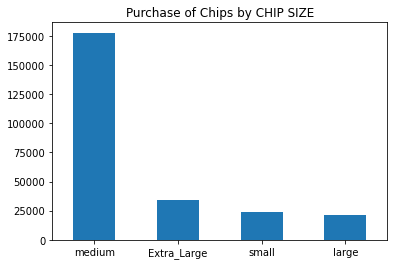

In [65]:
# displaying the purchase of chips by their bag size
transaction_data_merged_chipsize.plot(kind = "bar")
plt.xticks(rotation = 360)
plt.title("Purchase of Chips by CHIP SIZE")
plt.show()

In [66]:
# saving the new file to csv including bag size

transaction_data_merged.to_csv("transaction_data_merged_2")

# 